In [2]:
pip install torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 3.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 2.8 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 2.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.9/217.9 kB 4.5 MB/s eta 0:00:00a 0:00:01
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.8 MB/s eta 0:00:0000:0100:01
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 3.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install onnx

  Using cached onnx-1.15.0.tar.gz (12.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 2.3 MB/s eta 0:00:00a 0:00:01
  Created wheel for onnx: filename=onnx-1.15.0-cp312-cp312-macosx_14_0_arm64.whl size=15394734 sha256=7c9b71e81f6ba973c987ba9e6ac0cd4d70fd4d849454858b496aeee26d5c1bba
  Stored in directory: /Users/manish/Library/Caches/pip/wheels/4a/fd/ab/6b6613d123c35464ba4d85827c819faa9888bf51efee86dfa8
Successfully built onnx
Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision.io import read_image
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms

# Initital configurations
SEED = 1234

def set_seeds(seed=1234):
    """Set seeds for reproducibility."""
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) # multi-GPU

# Set seeds for reproducibility
set_seeds(seed=SEED)

# Set device
cuda = True
device = torch.device("cuda" if (
    torch.cuda.is_available() and cuda) else "cpu")

print(device)

cpu


In [18]:
normal_df = pd.read_excel('datasets/normal.xlsx')
tuberculosis_df = pd.read_excel('datasets/tuberculosis.xlsx')

print("-------------------Dataset------------------")
print("Total Normal CXR Images: ",len(normal_df))
print("Total Tuberculosis CXR Images: ",len(tuberculosis_df))

-------------------Dataset------------------
Total Normal CXR Images:  3500
Total Tuberculosis CXR Images:  700


In [20]:
# Splitting the datasets
import glob
normal = glob.glob("datasets/normal/*")
tb = glob.glob("datasets/tuberculosis/*")

# Splitting in 70:15:15 ratio 
train_path = normal[:2450] + tb[:490]
val_path = normal[2450:2975] + tb[490:595]
test_path = normal[2975:] + tb[595:]

# shuffling 
random.shuffle(train_path)
random.shuffle(val_path)
random.shuffle(test_path)

print("-------------------Dataset------------------")
print("Total train CXR Images: ",len(train_path))
print("Total val CXR Images: ",len(val_path))
print("Total test CXR Images: ",len(test_path))

-------------------Dataset------------------
Total train CXR Images:  2940
Total val CXR Images:  630
Total test CXR Images:  630


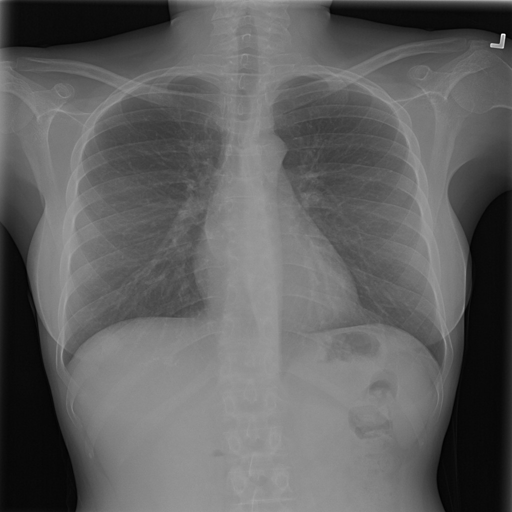

In [21]:
Image.open(train_path[0])

In [22]:
data_transforms = {
    'train': transforms.Compose([
        # transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.Resize(256),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'others': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [23]:
class TB_CXR_Dataset(Dataset):
    def __init__(self, images, transform=None):
        self.img_paths = images
        self.img_labels = [0 if "normal" in img else 1 for img in self.img_paths]
        self.transform = transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # get the image path and label for the specified index
        img_path = self.img_paths[idx]
        label = self.img_labels[idx]

        # load the image from the path
        image = Image.open(img_path)
        image = image.convert("RGB")

        # apply transform
        if self.transform:
            image = self.transform(image)
        
        # return the image and label as a tuple
        return image, label

# Dataset for train, valid and test
train_data = TB_CXR_Dataset(train_path, transform = data_transforms["train"]) 
valid_data = TB_CXR_Dataset(val_path, transform = data_transforms["others"]) 
test_data = TB_CXR_Dataset(test_path, transform = data_transforms["others"]) 

# Dataloader for train, valid and test
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

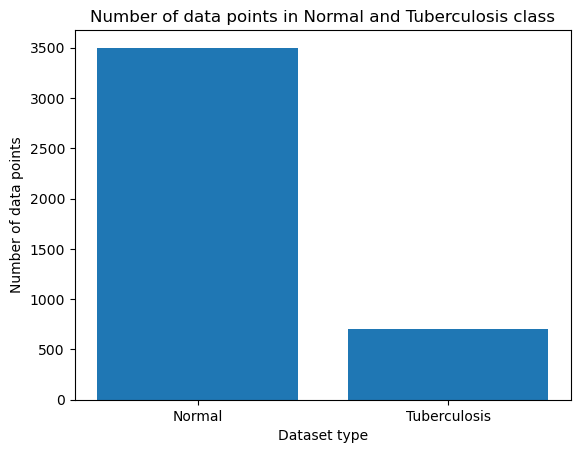

In [24]:
import matplotlib.pyplot as plt
normal_size = len(normal_df)
Tuberculosis_size = len(tuberculosis_df)
sizes = [normal_size, Tuberculosis_size]

plt.bar(['Normal', 'Tuberculosis'], sizes)

plt.xlabel('Dataset type')
plt.ylabel('Number of data points')
plt.title('Number of data points in Normal and Tuberculosis class')

plt.show()

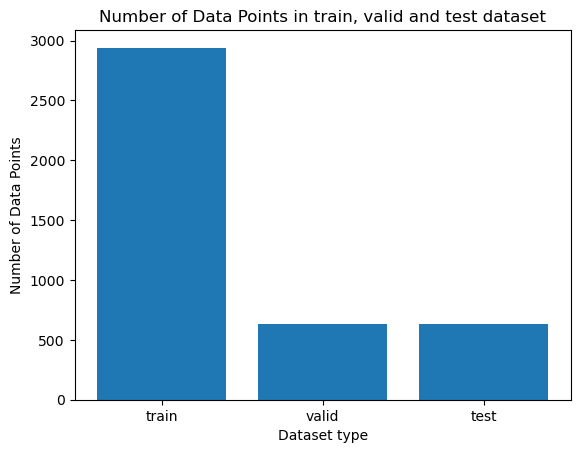

In [25]:
# Get the number of data points in each dataset
train_size = len(train_data)
valid_size = len(valid_data)
test_size = len(test_data) 

# Create a list of the sizes of each dataset
sizes = [train_size, valid_size, test_size]

# Create a bar plot with the sizes of the datasets
plt.bar(['train', 'valid', 'test'], sizes)

# Add labels and title to the plot
plt.xlabel('Dataset type')
plt.ylabel('Number of Data Points')
plt.title('Number of Data Points in train, valid and test dataset')

# Show the plot
plt.show()

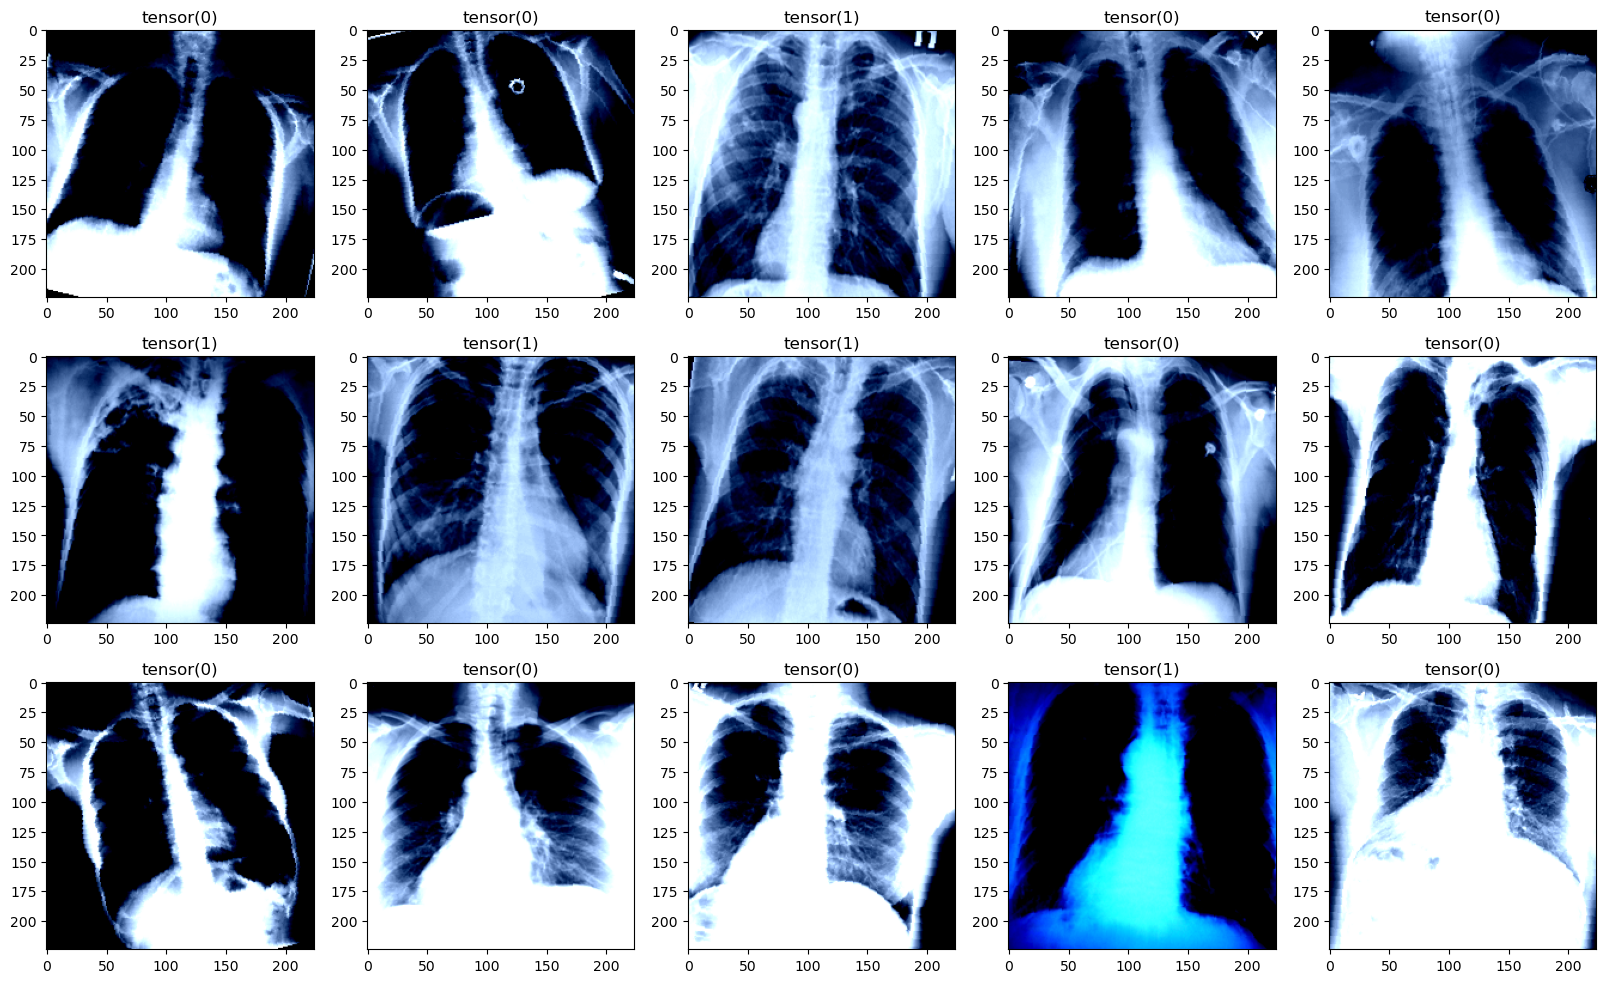

In [26]:
# Load your data using a PyTorch dataloader
data, labels = next(iter(train_dataloader))

# Create a figure with a grid of subplots
fig, axs = plt.subplots(nrows=3, ncols=5,figsize=(20, 12))

# Plot the images in the subplots
for i, ax in enumerate(axs.flat):
    # Get the image and label for the current subplot
    image, label = data[i], labels[i]
    
    # Convert the image to a numpy array and plot it
    img = image.numpy().transpose((1, 2, 0))
    # mean = np.array([0.485, 0.456, 0.406])
    # std = np.array([0.229, 0.224, 0.225])
    # img = std * img + mean
    img = np.clip(img, 0, 1)

    ax.imshow(img)
    
    # Set the title of the subplot to the label
    ax.set_title(label)

# Show the plot
plt.show()

In [27]:
from torchvision.models import densenet121,DenseNet121_Weights, DenseNet

#model architecture
class CXR_DenseNetModel(nn.Module):
  """DenseNet121 pretrained model definition."""
  def __init__(self, num_classes):
      super(CXR_DenseNetModel, self).__init__()

      self.model = torchvision.models.densenet121(pretrained=True)

      # Freeze the model's parameters
      for param in self.model.parameters():
          param.requires_grad = False

      # Replace the last linear layer of the model
      in_features = self.model.classifier.in_features
      self.model.classifier = nn.Sequential( 
          nn.Linear(in_features, in_features // 2),
          nn.Dropout(0.5),
          nn.Linear(in_features // 2, in_features // 4),
          # nn.Dropout(0.5),
          nn.Linear(in_features // 4, in_features // 8),
          nn.Dropout(0.25),
          nn.Linear(in_features // 8, num_classes),
      )

  def forward(self, x):
      return self.model(x)

model = CXR_DenseNetModel(num_classes=2)


# set device
model = model.to(device) 
model

/Users/manish/Desktop/TB_Project/env/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/manish/Desktop/TB_Project/env/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /Users/manish/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100.0%


CXR_DenseNetModel(
  (model): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, mome

In [28]:
# calculating weights for each classes

def class_weight(x,total):
  return 1 - (x/total)

total = 2450 + 490
class_weights = torch.tensor([class_weight(2450,total),class_weight(490,total)])

In [29]:
# Define the Binary CrossEntropy with Logits loss function and Adam optimizer
loss_fn = nn.BCEWithLogitsLoss(weight = class_weights.to(device))
optimizer = optim.Adam(model.parameters(),lr=0.001)

# Decay LR by a factor of 0.1 every 3 epochs
# scheduler = lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [32]:
from tqdm import tqdm
train_losses = []
valid_losses = []
train_acc = []
valid_acc=[]
# Define a function for the training loop
def train(model, loss_fn, optimizer, num_epochs):

    for epoch in tqdm(range(num_epochs)):

        # Training
        # Set the model to training mode
        model.train()

        train_size = 0
        train_loss = 0.0
        train_accuracy = 0.0

        # Loop through the training dataloader
        for batch_idx, (images, labels) in enumerate(train_dataloader):
            images, labels = images.to(device), labels.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, F.one_hot(labels,2).float())

            # Compute accuracy
            _, preds = torch.max(outputs, 1)
            train_accuracy += torch.sum(preds == labels.data)

            # Backward pass
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)
            train_size += images.size(0)

        # Validation
        # Set the model to evalutaion mode
        model.eval()

        valid_size = 0
        valid_loss = 0.0
        valid_accuracy = 0.0

        # Loop through the validing dataloader
        for batch_idx, (images, labels) in enumerate(valid_dataloader):
            images, labels = images.to(device), labels.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, F.one_hot(labels,2).float())

            # Compute accuracy
            _, preds = torch.max(outputs, 1)
            valid_accuracy += torch.sum(preds == labels.data)

            # Backward pass
            loss.backward()
            optimizer.step()

            valid_loss += loss.item() * images.size(0)
            valid_size += images.size(0)

        # Print training and validation statistics
        train_loss = train_loss / train_size
        train_losses.append(train_loss)
        train_accuracy = train_accuracy / train_size
        train_acc.append(train_accuracy)

        valid_loss = valid_loss / valid_size
        valid_losses.append(valid_loss)

        valid_accuracy = valid_accuracy / valid_size
        valid_acc.append(valid_accuracy)

        
        print(f"\nTrain Loss: {train_loss:.3f},Train Accuracy: {train_accuracy:.3f}, Valid Loss: {valid_loss:.3f}, Valid Accuracy: {valid_accuracy:.2f}")

# Train the model
train(model, loss_fn, optimizer, num_epochs=25)

  4%|█▋                                       | 1/25 [08:12<3:16:52, 492.21s/it]


Train Loss: 0.119,Train Accuracy: 0.915, Valid Loss: 0.039, Valid Accuracy: 0.97


  8%|███▎                                     | 2/25 [16:17<3:07:02, 487.95s/it]


Train Loss: 0.087,Train Accuracy: 0.948, Valid Loss: 0.025, Valid Accuracy: 0.99


 12%|████▉                                    | 3/25 [26:13<3:17:02, 537.36s/it]


Train Loss: 0.077,Train Accuracy: 0.945, Valid Loss: 0.027, Valid Accuracy: 0.98


 16%|██████▌                                  | 4/25 [41:02<3:56:37, 676.08s/it]


Train Loss: 0.047,Train Accuracy: 0.968, Valid Loss: 0.017, Valid Accuracy: 0.99


 20%|████████▏                                | 5/25 [51:56<3:42:46, 668.30s/it]


Train Loss: 0.041,Train Accuracy: 0.969, Valid Loss: 0.012, Valid Accuracy: 0.99


 24%|█████████▎                             | 6/25 [1:16:18<4:57:01, 938.00s/it]


Train Loss: 0.050,Train Accuracy: 0.965, Valid Loss: 0.017, Valid Accuracy: 0.99


 28%|██████████▉                            | 7/25 [1:23:08<3:49:38, 765.49s/it]


Train Loss: 0.043,Train Accuracy: 0.970, Valid Loss: 0.025, Valid Accuracy: 0.98


 32%|████████████▏                         | 8/25 [1:49:12<4:48:56, 1019.78s/it]


Train Loss: 0.044,Train Accuracy: 0.970, Valid Loss: 0.012, Valid Accuracy: 0.99


 36%|██████████████                         | 9/25 [1:56:06<3:41:26, 830.38s/it]


Train Loss: 0.045,Train Accuracy: 0.971, Valid Loss: 0.014, Valid Accuracy: 0.99


 40%|███████████████▏                      | 10/25 [2:05:31<3:07:06, 748.45s/it]


Train Loss: 0.037,Train Accuracy: 0.975, Valid Loss: 0.011, Valid Accuracy: 0.99


 44%|████████████████▋                     | 11/25 [2:18:17<2:55:53, 753.82s/it]


Train Loss: 0.046,Train Accuracy: 0.965, Valid Loss: 0.007, Valid Accuracy: 1.00


 48%|██████████████████▏                   | 12/25 [2:25:23<2:21:43, 654.08s/it]


Train Loss: 0.039,Train Accuracy: 0.976, Valid Loss: 0.007, Valid Accuracy: 0.99


 52%|███████████████████▊                  | 13/25 [2:44:54<2:42:08, 810.73s/it]


Train Loss: 0.040,Train Accuracy: 0.970, Valid Loss: 0.010, Valid Accuracy: 1.00


 56%|████████████████████▋                | 14/25 [3:24:10<3:54:12, 1277.53s/it]


Train Loss: 0.044,Train Accuracy: 0.970, Valid Loss: 0.009, Valid Accuracy: 1.00


 60%|██████████████████████▏              | 15/25 [4:02:04<4:22:56, 1577.70s/it]


Train Loss: 0.043,Train Accuracy: 0.972, Valid Loss: 0.009, Valid Accuracy: 1.00


 64%|███████████████████████▋             | 16/25 [4:08:47<3:03:36, 1224.10s/it]


Train Loss: 0.045,Train Accuracy: 0.970, Valid Loss: 0.029, Valid Accuracy: 0.98


 68%|█████████████████████████▊            | 17/25 [4:15:49<2:11:05, 983.13s/it]


Train Loss: 0.038,Train Accuracy: 0.976, Valid Loss: 0.008, Valid Accuracy: 1.00


 72%|██████████████████████████▋          | 18/25 [4:54:08<2:40:47, 1378.26s/it]


Train Loss: 0.049,Train Accuracy: 0.968, Valid Loss: 0.011, Valid Accuracy: 1.00


 76%|████████████████████████████         | 19/25 [5:05:25<1:56:46, 1167.76s/it]


Train Loss: 0.034,Train Accuracy: 0.978, Valid Loss: 0.005, Valid Accuracy: 1.00


 80%|████████████████████████████▊       | 20/25 [10:02:50<8:34:34, 6174.95s/it]


Train Loss: 0.030,Train Accuracy: 0.983, Valid Loss: 0.003, Valid Accuracy: 1.00


 84%|██████████████████████████████▏     | 21/25 [10:09:34<4:56:10, 4442.58s/it]


Train Loss: 0.048,Train Accuracy: 0.971, Valid Loss: 0.014, Valid Accuracy: 0.99


 88%|███████████████████████████████▋    | 22/25 [10:16:26<2:41:39, 3233.15s/it]


Train Loss: 0.042,Train Accuracy: 0.970, Valid Loss: 0.005, Valid Accuracy: 1.00


 92%|█████████████████████████████████   | 23/25 [10:23:26<1:19:37, 2388.73s/it]


Train Loss: 0.047,Train Accuracy: 0.968, Valid Loss: 0.004, Valid Accuracy: 1.00


 96%|████████████████████████████████████▍ | 24/25 [10:30:28<29:58, 1798.84s/it]


Train Loss: 0.034,Train Accuracy: 0.979, Valid Loss: 0.012, Valid Accuracy: 0.99


100%|██████████████████████████████████████| 25/25 [10:37:37<00:00, 1530.29s/it]


Train Loss: 0.034,Train Accuracy: 0.978, Valid Loss: 0.008, Valid Accuracy: 1.00


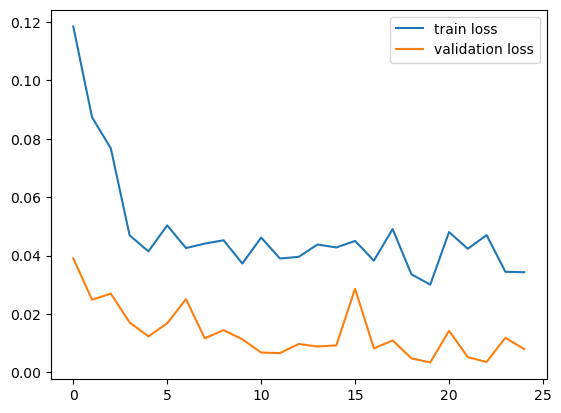

In [33]:
# plot train and test losses
plt.plot(train_losses, label='train loss')
plt.plot(valid_losses, label='validation loss')
plt.legend()
plt.show()

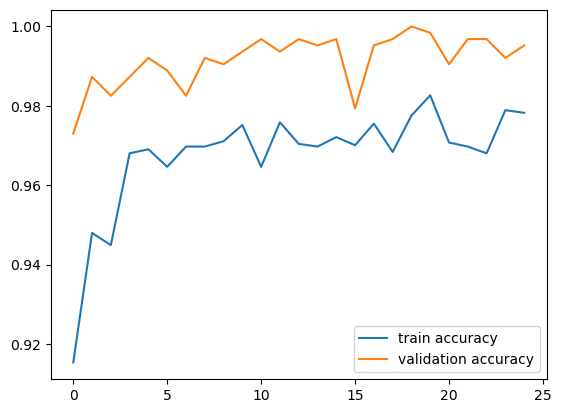

In [34]:
# plot train and test acc
train_acc_np= np.array([x.cpu().numpy() for x in train_acc])
valid_acc_np= np.array([x.cpu().numpy() for x in valid_acc])

plt.plot(train_acc_np, label='train accuracy')
plt.plot(valid_acc_np, label='validation accuracy')
plt.legend()
plt.show()

In [35]:
# Evaluation on test set
y_true = []
y_hat = []

test_size = 0
test_loss = 0.0
test_accuracy = 0.0
# Loop through the testing dataloader
for batch_idx, (images, labels) in enumerate(test_dataloader):
    images, labels = images.to(device), labels.to(device)

    # Zero the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(images)
    loss = loss_fn(outputs, F.one_hot(labels,2).float())

    # Compute accuracy
    _, preds = torch.max(outputs, 1)
    test_accuracy += torch.sum(preds == labels.data)

    y_true.extend(labels.detach().cpu().numpy().tolist())
    y_hat.extend(preds.detach().cpu().numpy().tolist())

    # Backward pass
    loss.backward()
    optimizer.step()

    test_loss += loss.item() * images.size(0)
    test_size += images.size(0)

In [38]:
import torchmetrics
from torchmetrics.classification import BinaryAccuracy, BinaryAUROC, BinaryF1Score
from mlxtend.plotting import plot_confusion_matrix

metrics_acc = BinaryAccuracy()
metric_auroc = BinaryAUROC(thresholds=None)
metric_f1 = BinaryF1Score()

target = torch.tensor(y_true)
preds = torch.tensor(y_hat)

# Accuracy
acc = metrics_acc(preds, target)

# AUROC
auroc = metric_auroc(preds, target)

# F1 Score
f1 = metric_f1(preds, target)

print("Test Accuracy: ", acc)
print("Test AUROC: ", auroc)
print("Test F1: ", f1)

Test Accuracy:  tensor(0.9952)
Test AUROC:  tensor(0.9857)
Test F1:  tensor(0.9855)


In [39]:
# Classification Report

from sklearn.metrics import classification_report
target_names = ['normal', 'tuberculosis']
print(classification_report(y_true, y_hat, target_names=target_names))

              precision    recall  f1-score   support

      normal       0.99      1.00      1.00       525
tuberculosis       1.00      0.97      0.99       105

    accuracy                           1.00       630
   macro avg       1.00      0.99      0.99       630
weighted avg       1.00      1.00      1.00       630



In [41]:
from sklearn.metrics import confusion_matrix

# first param is the actual output values
# second param is what our model predicted
conf_matrix = confusion_matrix(y_true, y_hat)

conf_matrix

array([[525,   0],
       [  3, 102]])

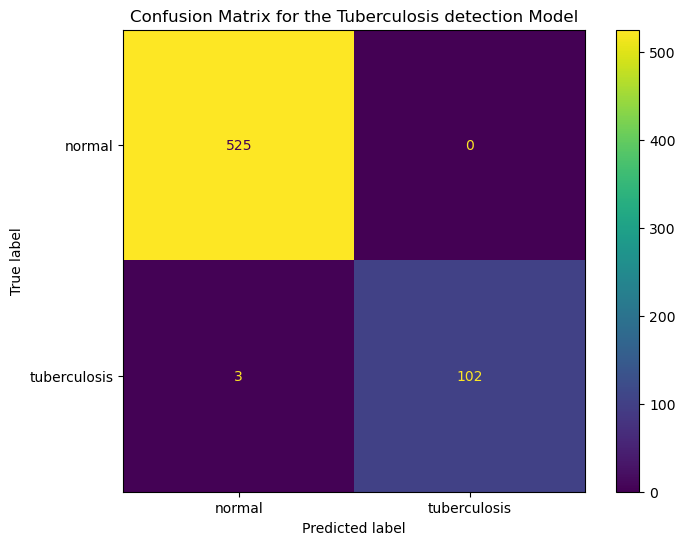

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=['normal', 'tuberculosis'])

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Tuberculosis detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);

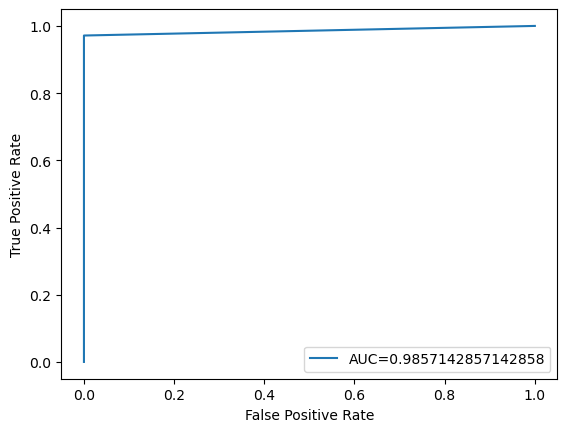

In [43]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_true,  y_hat)
auc = metrics.roc_auc_score(y_true, y_hat)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [48]:
torch.save(model, 'model.pth')

In [49]:
# loading model
PATH = "model.pth"
model = torch.load(PATH,map_location=torch.device('cpu'))

In [53]:
# saving the model in onnx format
import torch.onnx 

 # set the model to inference mode
model.eval()

# Input to the model
x = torch.randn(1, 3, 224, 224, requires_grad=True)

input_names = [ "actual_input" ]
output_names = [ "output" ]

torch.onnx.export(model,
                 x,
                 "model.onnx",
                 verbose=False,
                 input_names=input_names,
                 output_names=output_names,
                 export_params=True,
                 )